<h2>Importing Packages<h2>

In [154]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

<h2>Importing Data<h2>

In [118]:
host =  '18.136.157.135'
username = 'dm_team2'
password = 'DM!$Team&27@9!20!'
database_name = 'project_sales'

In [119]:
connection = mysql.connector.connect(host=host,database=database_name,user=username,password=password)

In [120]:
query = '''select * from data'''
cursor = connection.cursor()
cursor.execute(query)
table_data = cursor.fetchall()
print(table_data)

[('14-11-2018 10:05', '', 'Website', '984XXXXXXX', 'aXXXXXXX@gmail.com', 'Sales-Agent-11', '', 'Mode-5', 'Open'), ('14-11-2018 09:22', '', 'Website', 'XXXXXXX', '#VALUE!', 'Sales-Agent-10', '', 'Mode-5', 'Open'), ('14-11-2018 09:21', '', 'Website', 'XXXXXXX', 'dXXXXXXX@yahoo.com', 'Sales-Agent-10', '', 'Mode-5', 'Open'), ('14-11-2018 08:46', '', 'Website', 'XXXXXXX', 'wXXXXXXX@gmail.com', 'Sales-Agent-10', '', 'Mode-5', 'Open'), ('14-11-2018 07:34', '', 'Website', 'XXXXXXX', 'cXXXXXXX@gmail.com', 'Sales-Agent-10', '', 'Mode-5', 'Open'), ('14-11-2018 07:33', '', 'Website', 'XXXXXXX', 'rXXXXXXX@gmail.com', 'Sales-Agent-10', '', 'Mode-5', 'Open'), ('14-11-2018 05:58', '', 'Website', 'XXXXXXX', 'aXXXXXXX@gmail.com', 'Sales-Agent-10', '', 'Mode-5', 'Open'), ('14-11-2018 05:49', '', 'Website', 'XXXXXXX', 'rXXXXXXX@gmail.com', 'Sales-Agent-10', '', 'Mode-5', 'Open'), ('14-11-2018 05:40', '', 'Website', '078XXXXXXX', 'DXXXXXXXheblue.com', 'Sales-Agent-10', '', 'Mode-5', 'Open'), ('14-11-2018 0

In [121]:
table_data

[('14-11-2018 10:05',
  '',
  'Website',
  '984XXXXXXX',
  'aXXXXXXX@gmail.com',
  'Sales-Agent-11',
  '',
  'Mode-5',
  'Open'),
 ('14-11-2018 09:22',
  '',
  'Website',
  'XXXXXXX',
  '#VALUE!',
  'Sales-Agent-10',
  '',
  'Mode-5',
  'Open'),
 ('14-11-2018 09:21',
  '',
  'Website',
  'XXXXXXX',
  'dXXXXXXX@yahoo.com',
  'Sales-Agent-10',
  '',
  'Mode-5',
  'Open'),
 ('14-11-2018 08:46',
  '',
  'Website',
  'XXXXXXX',
  'wXXXXXXX@gmail.com',
  'Sales-Agent-10',
  '',
  'Mode-5',
  'Open'),
 ('14-11-2018 07:34',
  '',
  'Website',
  'XXXXXXX',
  'cXXXXXXX@gmail.com',
  'Sales-Agent-10',
  '',
  'Mode-5',
  'Open'),
 ('14-11-2018 07:33',
  '',
  'Website',
  'XXXXXXX',
  'rXXXXXXX@gmail.com',
  'Sales-Agent-10',
  '',
  'Mode-5',
  'Open'),
 ('14-11-2018 05:58',
  '',
  'Website',
  'XXXXXXX',
  'aXXXXXXX@gmail.com',
  'Sales-Agent-10',
  '',
  'Mode-5',
  'Open'),
 ('14-11-2018 05:49',
  '',
  'Website',
  'XXXXXXX',
  'rXXXXXXX@gmail.com',
  'Sales-Agent-10',
  '',
  'Mode-5',
  '

In [122]:
data = pd.read_sql(query,connection)

In [123]:
data.head(10)

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
5,14-11-2018 07:33,,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
6,14-11-2018 05:58,,Website,XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
7,14-11-2018 05:49,,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
8,14-11-2018 05:40,,Website,078XXXXXXX,DXXXXXXXheblue.com,Sales-Agent-10,,Mode-5,Open
9,14-11-2018 05:06,,Website,XXXXXXX,jXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


<h2>Performing EDA<h2>

In [124]:
data.shape

(7422, 9)

In [125]:
data.dtypes

Created          object
Product_ID       object
Source           object
Mobile           object
EMAIL            object
Sales_Agent      object
Location         object
Delivery_Mode    object
Status           object
dtype: object

In [126]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [127]:
data.drop(['Created','Mobile','EMAIL'],axis=1,inplace=True)

In [128]:
data.head(10)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,,Website,Sales-Agent-11,,Mode-5,Open
1,,Website,Sales-Agent-10,,Mode-5,Open
2,,Website,Sales-Agent-10,,Mode-5,Open
3,,Website,Sales-Agent-10,,Mode-5,Open
4,,Website,Sales-Agent-10,,Mode-5,Open
5,,Website,Sales-Agent-10,,Mode-5,Open
6,,Website,Sales-Agent-10,,Mode-5,Open
7,,Website,Sales-Agent-10,,Mode-5,Open
8,,Website,Sales-Agent-10,,Mode-5,Open
9,,Website,Sales-Agent-10,,Mode-5,Open


In [131]:
data.replace('',np.nan,inplace=True)

In [132]:
data.isnull().sum()

Product_ID       58
Source           17
Sales_Agent      23
Location         58
Delivery_Mode     0
Status            0
dtype: int64

In [133]:
data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)

In [134]:
data.shape

(7328, 6)

In [141]:
data['Product_ID'].value_counts()

18    1706
15    1501
19    1188
9      990
27     737
5      484
10     168
1      104
20     101
25      90
21      65
2       38
12      36
26      31
14      27
11      12
22       8
6        7
3        7
17       6
8        6
13       4
16       3
24       2
23       2
0        2
28       1
4        1
7        1
Name: Product_ID, dtype: int64

In [135]:
data['Source'].value_counts()

Call                             2536
Live Chat-Direct                 1827
Website                          1551
Live Chat-Google Organic          269
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        129
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      49
By Recommendation                  32
CRM form                           22
Existing Customer                  22
Live Chat-Google Ads               20
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Youtube                   2
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Justdial                  1
E-Mail Message                      1
Name: Source, dtype: int64

In [136]:
data['Sales_Agent'].value_counts()

Sales-Agent-4     1495
Sales-Agent-11    1414
Sales-Agent-5     1182
Sales-Agent-9      878
Sales-Agent-3      780
Sales-Agent-7      734
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10       5
Name: Sales_Agent, dtype: int64

In [137]:
data['Location'].value_counts()

Other Locations    2481
Bangalore          2079
Chennai             907
Hyderabad           527
Delhi               470
Mumbai              399
Pune                139
UAE                  77
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [138]:
data['Delivery_Mode'].value_counts()

Mode-5    2903
Mode-1    2614
Mode-3    1681
Mode-4     120
Mode-2      10
Name: Delivery_Mode, dtype: int64

In [139]:
data['Status'].value_counts()

Junk Lead               1532
Not Responding          1119
CONVERTED                834
Just Enquiry             751
Potential                705
Long Term                644
In Progress Positive     642
In Progress Negative     625
LOST                     439
Open                      19
converted                 18
Name: Status, dtype: int64

In [142]:
data.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',
                    'Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Youtube',
                    'Live Chat-Justdial'],'Live Chat',inplace=True)
data.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
data.Source.replace('By Recommendation','Customer Referral',inplace=True)
data.Source.replace(['US Website','Just Dial'],'Website',inplace=True)
data.Source.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [143]:
data.Location.replace(['UAE','USA','UK','AUSTRALIA','Singapore','Malaysia','EUROPE'],'Foreign',inplace=True)
data.Location.replace(['Howrah','Kolkata','Trivandrum'],'Other Locations',inplace=True)

In [144]:
data.Product_ID.replace(['8','6','3','17','22','11','7','28','0','23','24','16','13','4','14','26','12','2','21','25'],'Less Sold Product',inplace=True)

In [145]:
data.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'Good',inplace=True)
data.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Bad',inplace=True)

In [146]:
data.head(10)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,Live Chat,Sales-Agent-3,Bangalore,Mode-1,Good
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,Good
2,18,Website,Sales-Agent-11,Other Locations,Mode-1,Good
3,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Bad
4,18,Call,Sales-Agent-7,Bangalore,Mode-1,Good
5,18,Live Chat,Sales-Agent-9,Other Locations,Mode-3,Bad
6,27,Call,Sales-Agent-11,Chennai,Mode-5,Good
7,19,Live Chat,Sales-Agent-4,Foreign,Mode-2,Good
8,19,Live Chat,Sales-Agent-4,Foreign,Mode-4,Bad
9,18,Call,Sales-Agent-7,Bangalore,Mode-1,Bad


<AxesSubplot:>

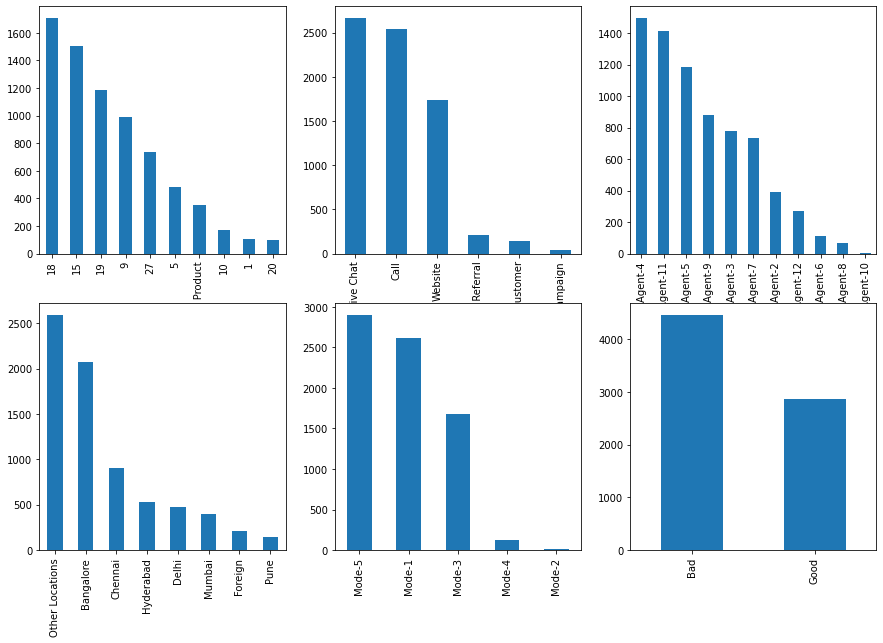

In [147]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
data.Product_ID.value_counts().plot(kind='bar')
plt.subplot(2,3,2)
data.Source.value_counts().plot(kind='bar')
plt.subplot(2,3,3)
data.Sales_Agent.value_counts().plot(kind='bar')
plt.subplot(2,3,4)
data.Location.value_counts().plot(kind='bar')
plt.subplot(2,3,5)
data.Delivery_Mode.value_counts().plot(kind='bar')
plt.subplot(2,3,6)
data.Status.value_counts().plot(kind='bar')

<h2>Data Processing<h2>

In [149]:
l1=LabelEncoder()
l2=LabelEncoder()
l3=LabelEncoder()
l4=LabelEncoder()
l5=LabelEncoder()
l6=LabelEncoder()

In [150]:
data['Product_ID'] = l1.fit_transform(data['Product_ID'])
data['Source'] = l1.fit_transform(data['Source'])
data['Sales_Agent'] = l1.fit_transform(data['Sales_Agent'])
data['Location'] = l1.fit_transform(data['Location'])
data['Delivery_Mode'] = l1.fit_transform(data['Delivery_Mode'])
data['Status'] = l1.fit_transform(data['Status'])

In [152]:
data.head(10)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,8,4,4,0,0,1
1,4,0,5,6,4,1
2,3,5,1,6,0,1
3,2,5,8,4,0,0
4,3,0,8,0,0,1
5,3,4,10,6,2,0
6,6,0,1,1,4,1
7,4,4,5,3,1,1
8,4,4,5,3,3,0
9,3,0,8,0,0,0


In [153]:
data.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,0.074868,0.056065,-0.226961,-0.181464,0.138943
Source,0.074868,1.000000,-0.023186,-0.003034,-0.216516,-0.015411
Sales_Agent,0.056065,-0.023186,1.000000,-0.140876,-0.224688,0.137074
Location,-0.226961,-0.003034,-0.140876,1.000000,0.414193,-0.347418
Delivery_Mode,-0.181464,-0.216516,-0.224688,0.414193,1.000000,-0.220445
Status,0.138943,-0.015411,0.137074,-0.347418,-0.220445,1.000000


In [156]:
x_train,x_test,y_train,y_test = train_test_split(data.drop('Status',axis=1),data.Status,test_size=0.3,random_state=42)

In [157]:
x_train.shape

(5129, 5)

In [158]:
x_test.shape

(2199, 5)

<h2>Models<h2>

<h2>Logistic Regression<h2>

In [160]:
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression()
model_logr.fit(x_train,y_train)

LogisticRegression()

In [162]:
y_predict_log = model_logr.predict(x_test)

In [163]:
print(accuracy_score(y_test,y_predict_log))
print(classification_report(y_test,y_predict_log))

0.6712141882673943
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1312
           1       0.61      0.51      0.56       887

    accuracy                           0.67      2199
   macro avg       0.66      0.65      0.65      2199
weighted avg       0.67      0.67      0.67      2199



In [164]:
print(confusion_matrix(y_test,y_predict_log))

[[1023  289]
 [ 434  453]]


<h2>Random Forest with GridSearchCV<h2>

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=23, random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [168]:
model_gridrf.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 3, 'min_samples_split': 2}

In [170]:
y_predict_rf = model_gridrf.predict(x_test)

In [171]:
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.7107776261937244
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1312
           1       0.67      0.56      0.61       887

    accuracy                           0.71      2199
   macro avg       0.70      0.69      0.69      2199
weighted avg       0.71      0.71      0.71      2199



In [172]:
print(confusion_matrix(y_test,y_predict_rf))

[[1067  245]
 [ 391  496]]


<h2>K-Nearest Nieghbor<h2>

In [173]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=6,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [174]:
y_predict_knn = model_knn.predict(x_test)

In [175]:
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.6766712141882674
              precision    recall  f1-score   support

           0       0.68      0.86      0.76      1312
           1       0.66      0.41      0.51       887

    accuracy                           0.68      2199
   macro avg       0.67      0.63      0.63      2199
weighted avg       0.67      0.68      0.66      2199



In [176]:
print(confusion_matrix(y_test,y_predict_knn))

[[1124  188]
 [ 523  364]]


<h2>XGBoost Classifier<h2>

In [178]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators=450,max_depth=17,gamma=5,learning_rate=0.01,random_state=10)
model_xgb.fit(x_train,y_train)

C:\Users\Sai Ganesh Yadav\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:04:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=17,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=450, n_jobs=4, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [180]:
y_predict_xgb = model_xgb.predict(x_test.values)

In [181]:
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.7203274215552524
              precision    recall  f1-score   support

           0       0.73      0.85      0.78      1312
           1       0.70      0.54      0.61       887

    accuracy                           0.72      2199
   macro avg       0.71      0.69      0.69      2199
weighted avg       0.72      0.72      0.71      2199



In [182]:
print(confusion_matrix(y_test,y_predict_xgb))

[[1109  203]
 [ 412  475]]


<h2>Artificial Neural Network<h2>

In [183]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(x_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [184]:
y_predict_mlp = model_mlp.predict(x_test)

In [185]:
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.6730331969076853
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1312
           1       0.63      0.46      0.53       887

    accuracy                           0.67      2199
   macro avg       0.66      0.64      0.64      2199
weighted avg       0.67      0.67      0.66      2199



In [186]:
print(confusion_matrix(y_test,y_predict_mlp))

[[1073  239]
 [ 480  407]]
